In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(1, "..")
from packages.alphastable import *
from packages.basicDistributionFunctions import tau

In [2]:
Image_width = 10
if 0:
    plt.rc('text', usetex = True) # latex ticks
    plt.rc('text.latex')
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ['Computer Modern'],
    })

    EXTRA_SMALL = 10
    SMALL_SIZE = 12
    MEDIUM_SIZE = 15
    BIGGER_SIZE = 20

    plt.rc('font', size=EXTRA_SMALL)         # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Indepedent symmetric marginals:

In [3]:
gamma_1 = 0.25
gamma_2 = 0.25
gamma_3 = 0.25
gamma_4 = 0.25

s_1 = [1, 0]
s_2 = [0, 1]
s_3 = [-1, 0]
s_4 = [0, -1]

Gamma = [gamma_1, gamma_2, gamma_3, gamma_4]
Points = [s_1, s_2, s_3, s_4]

In [4]:
Alphas = np.arange(0.05, 2, 0.05)
N = 10000
Codif = np.ones((len(Alphas), 2))
Covar = np.ones(len(Alphas))
for i, alp in enumerate(Alphas):
    MA = multivariate_alphastable(alp, Gamma, Points, N)
    x = MA[:, 0]
    y = MA[:, 1]
    Codif[i, :] = tau(x, y)
    Covar[i] = np.cov(x, y, ddof = 0)[0, 1] # estimator of the population covariance (another option is to include bias = True)


Text(0.5, 0, '$\\alpha$')

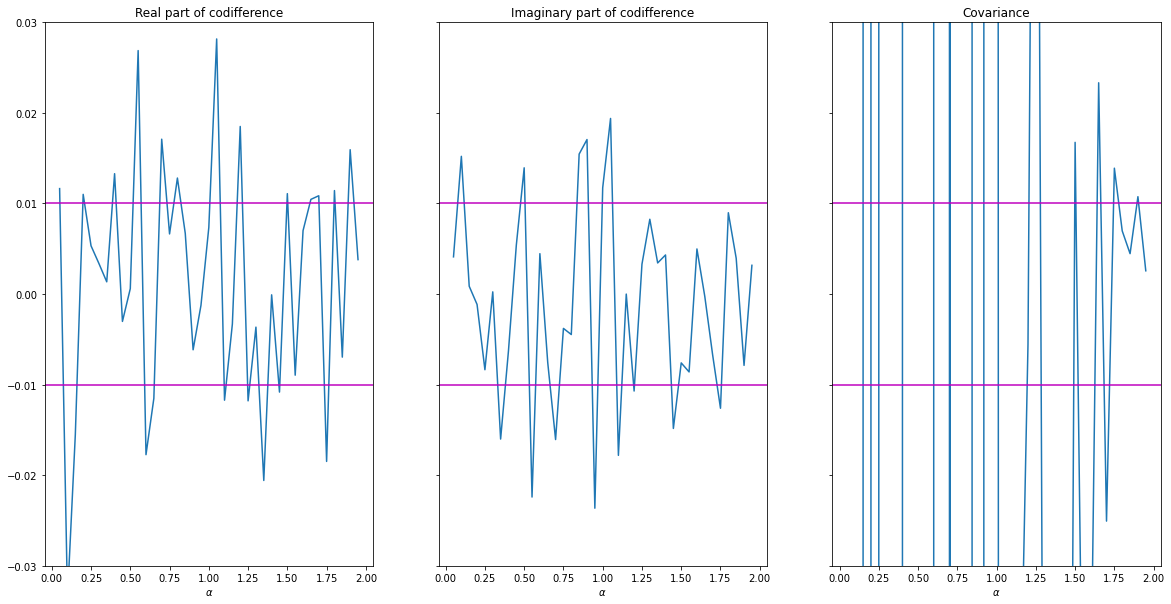

In [5]:
fig, axs = plt.subplots(ncols = 3, figsize = (2 * Image_width, Image_width), sharey=True)
ax = axs[0]
ax.plot(Alphas, Codif[:, 0]);
ax.axhline(y = 0.01, color= 'm');
ax.axhline(y = -0.01, color= 'm');
ax.set_title("Real part of codifference");
ax.set_xlabel("$\\alpha$");

ax = axs[1]
ax.plot(Alphas, Codif[:, 1]);
ax.axhline(y = 0.01, color= 'm');
ax.axhline(y = -0.01, color= 'm');
ax.set_title("Imaginary part of codifference");
ax.set_xlabel("$\\alpha$");

ax = axs[2]
ax.plot(Alphas, Covar);
ax.axhline(y = 0.01, color= 'm');
ax.axhline(y = -0.01, color= 'm');
ax.set_ylim([-0.03, 0.03]);
ax.set_title("Covariance");
ax.set_xlabel("$\\alpha$");


Symmetric spectral measure:


In [6]:
gamma_1 = 0.25
gamma_2 = 0.25
gamma_3 = 0.25
gamma_4 = 0.25

s_1 = [np.sqrt(2) / 2, np.sqrt(2) / 2,]
s_2 = [-np.sqrt(2) / 2, np.sqrt(2) / 2]
s_3 = [-np.sqrt(2) / 2, -np.sqrt(2) / 2]
s_4 = [np.sqrt(2) / 2, -np.sqrt(2) / 2]

Gamma = [gamma_1, gamma_2, gamma_3, gamma_4]
Points = [s_1, s_2, s_3, s_4]

In [7]:
Alphas = np.arange(0.05, 2, 0.05)
N = 10000
Codif = np.ones((len(Alphas), 2))
Covar = np.ones(len(Alphas))
for i, alp in enumerate(Alphas):
    MA = multivariate_alphastable(alp, Gamma, Points, N)
    x = MA[:, 0]
    y = MA[:, 1]
    Codif[i, :] = tau(x, y)
    Covar[i] = np.cov(x, y, ddof = 0)[0, 1] # estimator of the population covariance (another option is to include bias = True)

Text(0.5, 0, '$\\alpha$')

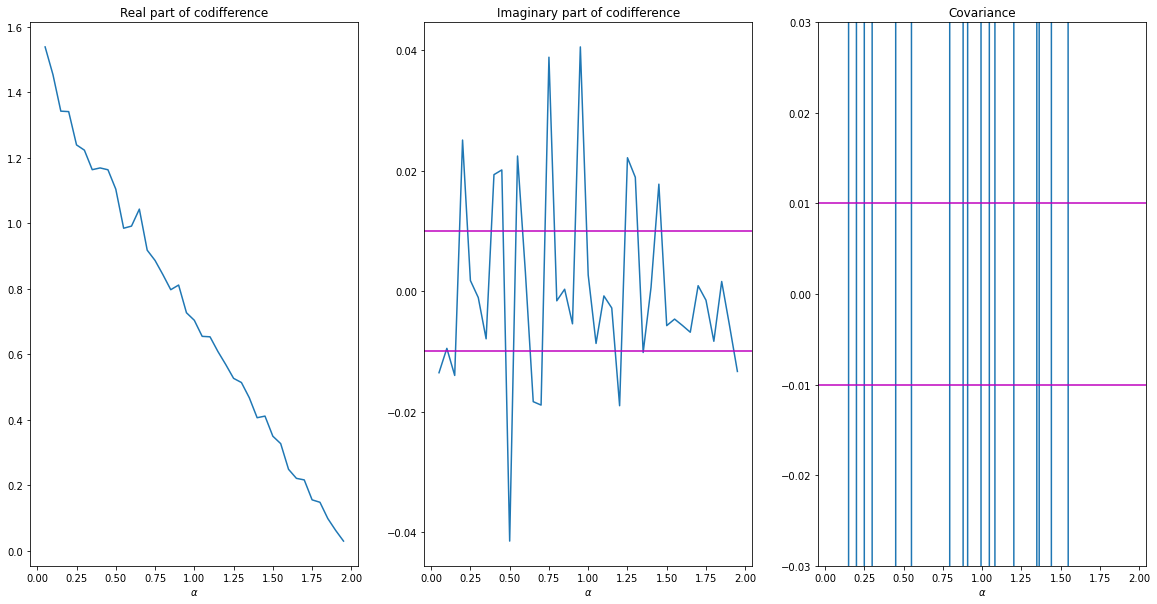

In [8]:
fig, axs = plt.subplots(ncols = 3, figsize = (2 * Image_width, Image_width))
ax = axs[0]
ax.plot(Alphas, Codif[:, 0])
ax.set_title("Real part of codifference")
ax.set_xlabel("$\\alpha$")

ax = axs[1]
ax.plot(Alphas, Codif[:, 1])
ax.axhline(y = 0.01, color= 'm')
ax.axhline(y = -0.01, color= 'm')
ax.set_title("Imaginary part of codifference")
ax.set_xlabel("$\\alpha$")

ax = axs[2]
ax.plot(Alphas, Covar)
ax.axhline(y = 0.01, color= 'm')
ax.axhline(y = -0.01, color= 'm')
ax.set_ylim([-0.03, 0.03])
ax.set_title("Covariance");
ax.set_xlabel("$\\alpha$")